\begin{equation*}
\newcommand{\E}{\mathbb{E}}
\end{equation*}




# Due Dates

* Textbook: Thursday, October 18, in class
* Coding: Thursday, October 18, at 11:59 PM

# Textbook Problems

* 3.9
* 3.10
* 3.12
* 3.13
* 3.20


In [1]:
# This is code to load the assignment.
# You'll need to run this code do or restart the assignment.
from loadAssignment import loadAssignment
Assignment, Questions, Submit, Data = loadAssignment(4)

# These are modules that we need
# once you run this code, you don't need to load them again
import autograd.numpy as np
import autograd as ag
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


# Question 0



Let $u$, $v$, and $w$ be scalar Gaussian random variables with mean zero and covariance:
\begin{equation*}
\E\left[
	\begin{bmatrix}
		u \\
		v \\
		w
	\end{bmatrix}
	\begin{bmatrix}
		u \\
		v \\
		w
	\end{bmatrix}^\top
	\right]
	= \left[\begin{matrix}2.421 & -0.13 & -1.904\\-0.13 & 0.23 & 0.107\\-1.904 & 0.107 & 1.683\end{matrix}\right]
\end{equation*}
Define $x$ and $y$ by
\begin{align*}
x &= u + v \\
y &= x + w
\end{align*}

Also assume that a values of $u = 1.851$ and $y=0.22$ are measured.

For convenience, the covariance and measurements are given here:


In [2]:
Cov = np.array([[2.421, -0.13, -1.904],
[-0.13, 0.23, 0.107],
[-1.904, 0.107, 1.683]])
u = 1.851
y = 0.22


Calculate $\E[x|u,y]$.



In [3]:
# M is a matrix mapping u,v,w to x,u,y

M = np.array([[1.,1.,0],
              [1.,0,0],
              [1.,1.,1.]])

# Sig is the covariance of x,u,y
Sig = np.dot(M,np.dot(Cov,M.T))

# The gain vector
K = la.solve(Sig[1:,1:],Sig[1:,0])
x_est = np.dot(K,np.hstack([u,y]))

Questions[0].checkAnswer(x_est)

That is correct. Nice.
A score of 1 was entered for Question 0




# Question 1




Say that $x_0 = 0$, and 
\begin{equation*}
x_{k+1} = \Phi x_k + w_k
\end{equation*}
where $w_k$ are independent Gaussians with mean $0$ and covariance $I$ and 
\begin{equation*}
\Phi = \left[\begin{matrix}-0.52 & 0.35\\0.0 & -0.25\end{matrix}\right]
\end{equation*}

For convenience, it is given here:


In [4]:
Phi = np.array([[-0.52, 0.35],
[0, -0.25]])


Let $\Sigma_k = \E[x_k x_k^\top]$ and let $\Sigma = \lim_{k\to\infty} \Sigma_k$. (It can be shown
that if all eigenvalues of $\Phi$ have magnitude less than $1$, then the limit of $\Sigma_k$ exists and is finite.)

What is $\Sigma$? (It will help to write an expression for $\Sigma_{k+1}$ in terms of $\Sigma_k$ and note that for large $k$, $\Sigma_{k+1} \approx \Sigma_k$.)

(The command `la.solve_discrete_lyapunov` may help.)



In [5]:
# Here is the fancy way.
Sigma = la.solve_discrete_lyapunov(Phi,np.eye(2))

# Here is the brute force way.

Sigma_test = np.zeros(2)
for _ in range(100):
    Sigma_test = np.dot(Phi,np.dot(Sigma_test,Phi.T)) + np.eye(2)

print(Sigma-Sigma_test)
Questions[1].checkAnswer(Sigma_test)

[[0. 0.]
 [0. 0.]]
Huzzah.
A score of 1 was entered for Question 1



# Question 2


Let $x_k$ be the sequence of vectors from the previous problem. Assume that we have
measurements of the form

\begin{equation*}
y_k = \begin{bmatrix} 1 & 0 \end{bmatrix} x_k + v_k
\end{equation*}

where $v_k$ is a zero mean, variance $1$ Gaussian white noise sequence which is independent of $w_k$. 

Let $\hat x_k^- = \E[x_k|y_{0:k-1}]$ be the a-priori estimate and let
Let $P_k^{-} = \E[(x_k-\hat x_k^-)(x_k-\hat x_k^-)^\top]$ be the a-priori filter covariance. In this problem, because $\Phi$ is stable, the limit $P= \lim_{k\to\infty}P_k^-$ is guaranteed exist and be finite. What is $P$?

(The command `la.solve_discrete_are` may help.)



In [6]:
# This is the fancy way.
Q = np.eye(2)
R = np.eye(1)
H = np.array([[1.,0.]])

P = la.solve_discrete_are(Phi.T,H.T,Q,R)

# You could alternatively compute P_k^- till it converges.
# It doesn't take long.

P_test = np.zeros((2,2))

def dot(*mats):
    if len(mats)==1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))

for _ in range(100):
    Psi = dot(H,P_test,H.T) + R
    K = la.solve(Psi,dot(H,P_test,Phi.T)).T
    P_test = dot(Phi,P_test,Phi.T) + Q - dot(K,Psi,K.T)

print(P-P_test)
Questions[2].checkAnswer(P_test)

[[-1.11022302e-15 -6.93889390e-17]
 [-6.93889390e-17  1.33226763e-15]]
Phenomenal
A score of 1 was entered for Question 2



# Question 3

Let $\hat x_k^-$ be the a-priori estimate from the previous problem. Let 
$D_k = \E[\hat x_k^- (\hat x_k^-)^\top]$. Let $D = \lim_{k\to\infty} D_k$. Calculate $D$. 



In [7]:
D = Sigma - P

Questions[3].checkAnswer(D)

Oh yeah!
A score of 1 was entered for Question 3



# Question 4

Let $P_k^-$ be the a-priori covariance from above 
Assume that the initial condition, $x_0=0$ is known.
Plot the entries of $P_k^-$ for $k=0,\ldots,19$.  

Your plot should have three lines, one for each of the unique entries of $P_k^-$. (Since $P_k^-$ is symmetric, the off-diagonal entries are identical.)



Phenomenal
A score of 1 was entered for Question 4


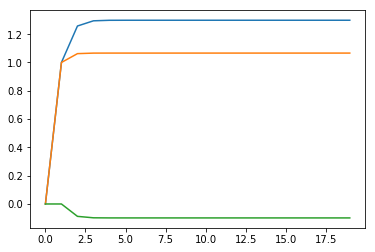

In [8]:
P_list = []
P = np.zeros((2,2))
for _ in range(20):
    P_list.append(np.hstack([np.diag(P),P[0,1]]))
    Psi = dot(H,P,H.T) + R
    K = la.solve(Psi,dot(H,P,Phi.T)).T
    P = dot(Phi,P,Phi.T) + Q - dot(K,Psi,K.T)
    
P_mat = np.array(P_list).T
for P_vec in P_mat:
    plt.plot(P_vec)


Questions[4].checkAnswer()




# Question 5

# Final Score

You can run this code to see all of your scores.




In [9]:
Assignment.showResults()

Problem 0: 1
Problem 1: 1
Problem 2: 1
Problem 3: 1
Problem 4: 1

Total: 5 / 5





# Submission

Save your work and run this cell to submit. It will only work if you have the internet.

